In [1]:
def sampleNo_to_seconds(sampleNo, sampling_frequency):
    time_in_seconds = sampleNo / sampling_frequency
    return time_in_seconds

def sampleNo_to_ms(sampleNo, sampling_frequency):
    return sampleNo_to_seconds(sampleNo, sampling_frequency)*1000

def seconds_to_sampleNo(time_in_seconds, sampling_frequency):
    sampleNo = time_in_seconds * sampling_frequency
    return sampleNo

In [12]:
import matplotlib.pyplot as plt
import wfdb
import numpy as np

# Choose database to plot from
db_name = 'BIDMC-CHF'  # ECG signal and annotations
#db_name = 'CHF-RR'  # annotations only
#db_name = 'NSR'  # ECG signal and annotations
#db_name = 'NSR-RR'  # annotations only
#db_name = 'FD'  # ECG signal and annotations

time_start_plot_sec = 1000 # choose starting point of plot, in seconds
seconds_to_plot = 10  # choose how many seconds of data to plot
time_end_plot_sec = time_start_plot_sec + seconds_to_plot

# BIDMC Congestive Heart Failure Database (BIDMC-CHF)
if db_name == 'BIDMC-CHF':
    data_dir_path = '../data/BIDMC-CHF_bidmc-congestive-heart-failure-database-1.0.0/files/'
    file = 'chf01'
    file_path = data_dir_path + file
    annotation_format = 'ecg' # format of the annotation files; file extension
    
    record = wfdb.rdrecord(file_path) # Load the record and annotation using WFDB
    annotation = wfdb.rdann(file_path, annotation_format) # Load the annotation (R-peak positions)

    sampling_frequency = annotation.fs
    sample_start = seconds_to_sampleNo(time_start_plot_sec, sampling_frequency) # first sample in selected data time interval
    sample_end = seconds_to_sampleNo(time_end_plot_sec, sampling_frequency) # last sample in selected data time interval

    record_selected = wfdb.rdrecord(file_path, sampfrom=sample_start, sampto=sample_end)
    annotation_selected = wfdb.rdann(file_path, annotation_format, sampfrom=sample_start, sampto=sample_end) # update to only include samples within chosen data interval

    print(record.sig_name) # Signal name(s)
    
    annotations_only = False

# Congestive Heart Failure RR Interval Database (CHF-RR)
if db_name == 'CHF-RR':
    data_dir_path = '../data/CHF-RR_congestive-heart-failure-rr-interval-database-1.0.0/'
    file = 'chf201'
    file_path = data_dir_path + file
    annotation_format = 'ecg'

    annotation = wfdb.rdann(file_path, annotation_format)

    sampling_frequency = annotation.fs
    sample_start = seconds_to_sampleNo(time_start_plot_sec, sampling_frequency) # first sample in selected data time interval
    sample_end = seconds_to_sampleNo(time_end_plot_sec, sampling_frequency) # last sample in selected data time interval

    annotation_selected = wfdb.rdann(file_path, annotation_format, sampfrom=sample_start, sampto=sample_end) # update to only include samples within chosen data interval

    annotations_only = True

# MIT-BIH Normal Sinus Rhythm Database (NSR)
if db_name == 'NSR':
    data_dir_path = '../data/NSR_mit-bih-normal-sinus-rhythm-database-1.0.0/'
    file = '16272'
    file_path = data_dir_path + file
    annotation_format = 'atr'
    
    record = wfdb.rdrecord(file_path) # Load the record and annotation using WFDB
    annotation = wfdb.rdann(file_path, annotation_format) # Load the annotation (R-peak positions)

    sampling_frequency = annotation.fs
    sample_start = seconds_to_sampleNo(time_start_plot_sec, sampling_frequency) # first sample in selected data time interval
    sample_end = seconds_to_sampleNo(time_end_plot_sec, sampling_frequency) # last sample in selected data time interval

    record_selected = wfdb.rdrecord(file_path, sampfrom=sample_start, sampto=sample_end)
    annotation_selected = wfdb.rdann(file_path, annotation_format, sampfrom=sample_start, sampto=sample_end) # update to only include samples within chosen data interval
    annotations_only = False

# Normal Sinus Rhythm RR Interval Database (NSR-RR)
if db_name == 'NSR-RR':
    data_dir_path = '../data/NSR-RR_normal-sinus-rhythm-rr-interval-database-1.0.0/'
    file = 'nsr002'
    file_path = data_dir_path + file
    annotation_format = 'ecg'

    annotation = wfdb.rdann(file_path, annotation_format)

    sampling_frequency = annotation.fs
    sample_start = seconds_to_sampleNo(time_start_plot_sec, sampling_frequency) # first sample in selected data time interval
    sample_end = seconds_to_sampleNo(time_end_plot_sec, sampling_frequency) # last sample in selected data time interval

    annotation_selected = wfdb.rdann(file_path, annotation_format, sampfrom=sample_start, sampto=sample_end) # update to only include samples within chosen data interval

    annotations_only = True

# Fantasia Database (FD)
if db_name == 'FD':
    data_dir_path = '../data/FD_fantasia-database-1.0.0/'
    file = 'f1o01'
    file_path = data_dir_path + file
    annotation_format = 'ecg' # format of the annotation files; file extension
    
    record = wfdb.rdrecord(file_path) # Load the record and annotation using WFDB
    annotation = wfdb.rdann(file_path, annotation_format) # Load the annotation (R-peak positions)

    sampling_frequency = annotation.fs
    sample_start = seconds_to_sampleNo(time_start_plot_sec, sampling_frequency) # first sample in selected data time interval
    sample_end = seconds_to_sampleNo(time_end_plot_sec, sampling_frequency) # last sample in selected data time interval

    record_selected = wfdb.rdrecord(file_path, sampfrom=sample_start, sampto=sample_end)
    annotation_selected = wfdb.rdann(file_path, annotation_format, sampfrom=sample_start, sampto=sample_end) # update to only include samples within chosen data interval
    
    annotations_only = False

['ECG1', 'ECG2']


Sampling frequency: 250



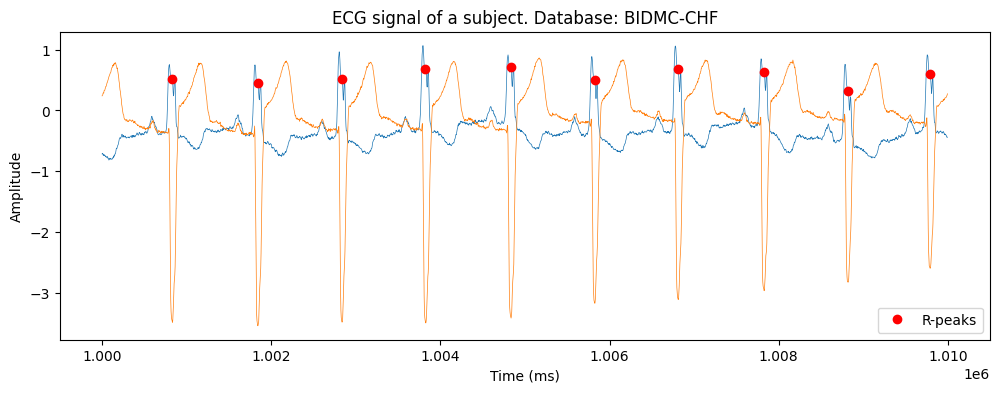

In [16]:
# Plot the ECG signals
x_start, x_stop = sample_start, sample_end
x_list = np.arange(x_start, x_stop)

plt.figure(figsize=(12, 4))

# Choose time unit ('sampleNo', 'seconds' or 'ms')
#unit = 'sampleNo'
#unit = 'seconds'
unit = 'ms'

# Include the 2nd channel of the ECG in the plot?
plot_ch2 = True

lw = 0.5 # Line width in plot

if annotations_only:
    # Use zeros for y-values to plot the annotations simply as markers on the x-axis
    y_values = np.zeros(len(annotation_selected.sample))
    
    if unit == 'sampleNo':
        plt.xlabel('Sample')
        
        # Overlay the R-peak annotations
        plt.plot(annotation_selected.sample, y_values, 'ro', label='R-peaks')
    
    elif unit == 'seconds':
        plt.xlabel('Time (s)')
        
        annotations_selected_sec = sampleNo_to_seconds(annotation_selected.sample, sampling_frequency)
        plt.plot(annotations_selected_sec, y_values, 'ro', label='R-peaks')
        
    elif unit == 'ms':
        plt.xlabel('Time (ms)')
        
        annotations_selected_ms = sampleNo_to_ms(annotation_selected.sample, sampling_frequency)
        plt.plot(annotations_selected_ms, y_values, 'ro', label='R-peaks')

    plt.title(f'ECG annotations of a subject. Database: {db_name}')
    plt.yticks([]) # remove y value labels
    plt.grid(True, axis='x')

else:
    signal_ch1 = record.p_signal[:, 0] # ECG signal, channel 1 (1D array)
    signal_ch2 = record.p_signal[:, 1] # ECG signal, channel 2 (1D array)
    annotations = annotation_selected.sample  # locations of annotations (1D array)
    
    if unit == 'sampleNo':
        plt.xlabel('Sample')
        plt.plot(x_list, signal_ch1[x_list], lw=lw)  # Plot first channel of ECG data
        plt.plot(x_list, signal_ch2[x_list], lw=lw) if plot_ch2 else None
        
        plt.plot(annotations, signal_ch1[annotations], 'ro', label='R-peaks')
    
    elif unit == 'seconds':
        plt.xlabel('Time (s)')
        x_list_seconds = sampleNo_to_seconds(x_list, sampling_frequency)

        plt.plot(x_list_seconds, signal_ch1[x_list], lw=lw)
        plt.plot(x_list_seconds, signal_ch2[x_list], lw=lw) if plot_ch2 else None

        annotations = annotation_selected.sample  # locations of annotations
        annotations_seconds = sampleNo_to_seconds(annotations, sampling_frequency)
        plt.plot(annotations_seconds, signal_ch1[annotations], 'ro', label='R-peaks')
        
    elif unit == 'ms':
        plt.xlabel('Time (ms)')
        x_list_ms = sampleNo_to_ms(x_list, sampling_frequency)
        
        plt.plot(x_list_ms, signal_ch1[x_list], lw=lw)
        plt.plot(x_list_ms, signal_ch2[x_list], lw=lw) if plot_ch2 else None

        annotations = annotation_selected.sample  # locations of annotations
        annotations_ms = sampleNo_to_ms(annotations, sampling_frequency) # locations of annotations, in time (ms)
        plt.plot(annotations_ms, signal_ch1[annotations], 'ro', label='R-peaks')

    plt.title(f'ECG signal of a subject. Database: {db_name}')
    plt.ylabel('Amplitude')

plt.legend()

# Display sampling frequency
print(f'Sampling frequency: {sampling_frequency}\n')

plt.show()